
# `Crime Analysis in America `


 Regitha Indah F
 

In [ ]:
#Load the data
#import drive
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Extraction

In [ ]:
#data
import pandas as pd 
data = pd.read_csv('/content/drive/My Drive/CGE/crime.csv', sep=',')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data.head()
#Murder = pembunuhan
#Rape = memperkosa
#Robbery = perampokan
#Assault = Serangan
#Burglary = Pencurian
#Theft = Pencurian
#Vehicle = Kendaraan

,Unnamed: 0,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
0,ME,2.0,14.8,28,102,803,2347,164
1,NH,2.2,21.5,24,92,755,2208,228
2,VT,2.0,21.8,22,103,949,2697,181
3,MA,3.6,29.7,193,331,1071,2189,906
4,RI,3.5,21.4,119,192,1294,2568,705


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  51 non-null     object 
 1   Murder      51 non-null     float64
 2   Rape        51 non-null     float64
 3   Robbery     51 non-null     int64  
 4   Assault     51 non-null     int64  
 5   Burglary    51 non-null     int64  
 6   Theft       51 non-null     int64  
 7   Vehicle     51 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 3.3+ KB


In [ ]:
#change column header
data = data.set_axis(['CityCode', 'Murder', 'Rape', 'Robbery', 'Assault', 'Burglary', 'Theft', 'Vehicle'], axis=1)

In [ ]:
data.head()

,CityCode,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
0,ME,2.0,14.8,28,102,803,2347,164
1,NH,2.2,21.5,24,92,755,2208,228
2,VT,2.0,21.8,22,103,949,2697,181
3,MA,3.6,29.7,193,331,1071,2189,906
4,RI,3.5,21.4,119,192,1294,2568,705


Code dibawah ini berguna untuk mengecek data yang kosong.
Berdasarkan hasilnya, tidak ada data yang kosong.

In [ ]:
data.isnull().sum()

CityCode    0
Murder      0
Rape        0
Robbery     0
Assault     0
Burglary    0
Theft       0
Vehicle     0
dtype: int64

Code dibawah ini berguna untuk mengecek data yang duplikat. Berdasarkan hasilnya, tidak ditemukan nilai data yang duplikat.

In [ ]:
data.duplicated().sum()

0

Fungsi describe() digunakan untuk menampilkan statistik deskriptif dari data frame.

In [ ]:
data.describe()

,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,7.250980,34.217647,154.098039,283.352941,1207.078431,2941.960784,393.843137
std,4.816861,14.570940,137.816437,148.338508,421.797148,763.421796,223.623288
min,1.000000,11.600000,7.000000,32.000000,385.000000,1358.000000,99.000000
25%,3.800000,23.450000,69.000000,177.000000,901.000000,2385.000000,211.500000
50%,6.600000,30.500000,112.000000,252.000000,1159.000000,2822.000000,328.000000
75%,9.700000,43.750000,207.000000,385.500000,1457.000000,3400.500000,544.500000
max,31.000000,72.700000,754.000000,668.000000,2221.000000,4373.000000,975.000000


In [ ]:
#cek unique values in each columns
for column in data.columns:
    print('Column: {} - Unique Values: {}'.format(column, data[column].unique()))

Column: CityCode - Unique Values: ['ME' 'NH' 'VT' 'MA' 'RI' 'CT' 'NY' 'NJ' 'PA' 'OH' 'IN' 'IL' 'MI' 'WI'
 'MN' 'IA' 'MO' 'ND' 'SD' 'NE' 'KS' 'DE' 'MD' 'DC' 'VA' 'WV' 'NC' 'SC'
 'GA' 'FL' 'KY' 'TN' 'AL' 'MS' 'AR' 'LA' 'OK' 'TX' 'MT' 'ID' 'WY' 'CO'
 'NM' 'AZ' 'UT' 'NV' 'WA' 'OR' 'CA' 'AK' 'HI']
Column: Murder - Unique Values: [ 2.   2.2  3.6  3.5  4.6 10.7  5.2  5.5  6.   8.9 11.3  3.1  2.5  1.8
  9.2  1.   4.   4.4  4.9  9.  31.   7.1  5.9  8.1  8.6 11.2 11.7  6.7
 10.4 10.1 12.8 13.5  2.9  3.2  5.3  7.  11.5  9.3 12.6  5.   6.6  4.8]
Column: Rape - Unique Values: [14.8 21.5 21.8 29.7 21.4 23.8 30.5 33.2 25.1 38.6 25.9 32.4 67.4 20.1
 31.8 12.5 29.2 11.6 17.7 24.6 32.9 56.9 43.6 52.4 26.5 18.9 26.4 41.3
 43.9 52.7 23.1 47.  28.4 25.8 28.9 40.1 36.4 51.6 17.3 20.  21.9 42.3
 46.9 43.  25.3 64.9 53.4 51.1 44.9 72.7 31. ]
Column: Robbery - Unique Values: [ 28  24  22 193 119 192 514 269 152 142  90 325 301  73 102  42 170   7
  16  51  80 124 304 754 106  41  88  99 214 367  83 208 112  65

# Visualizations

In [ ]:
import seaborn as sns

In [ ]:
#Total Crime dari masing-masing City Code
data['TotalCrime'] = data["Murder"]+data["Rape"]+data["Robbery"]+data["Assault"]+data["Burglary"]+data["Theft"]+data["Vehicle"]

In [ ]:
data.head()

,CityCode,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,TotalCrime
0,ME,2.0,14.8,28,102,803,2347,164,3460.8
1,NH,2.2,21.5,24,92,755,2208,228,3330.7
2,VT,2.0,21.8,22,103,949,2697,181,3975.8
3,MA,3.6,29.7,193,331,1071,2189,906,4723.3
4,RI,3.5,21.4,119,192,1294,2568,705,4902.9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'City'), Text(0.5, 0, 'Total number of crimes')]

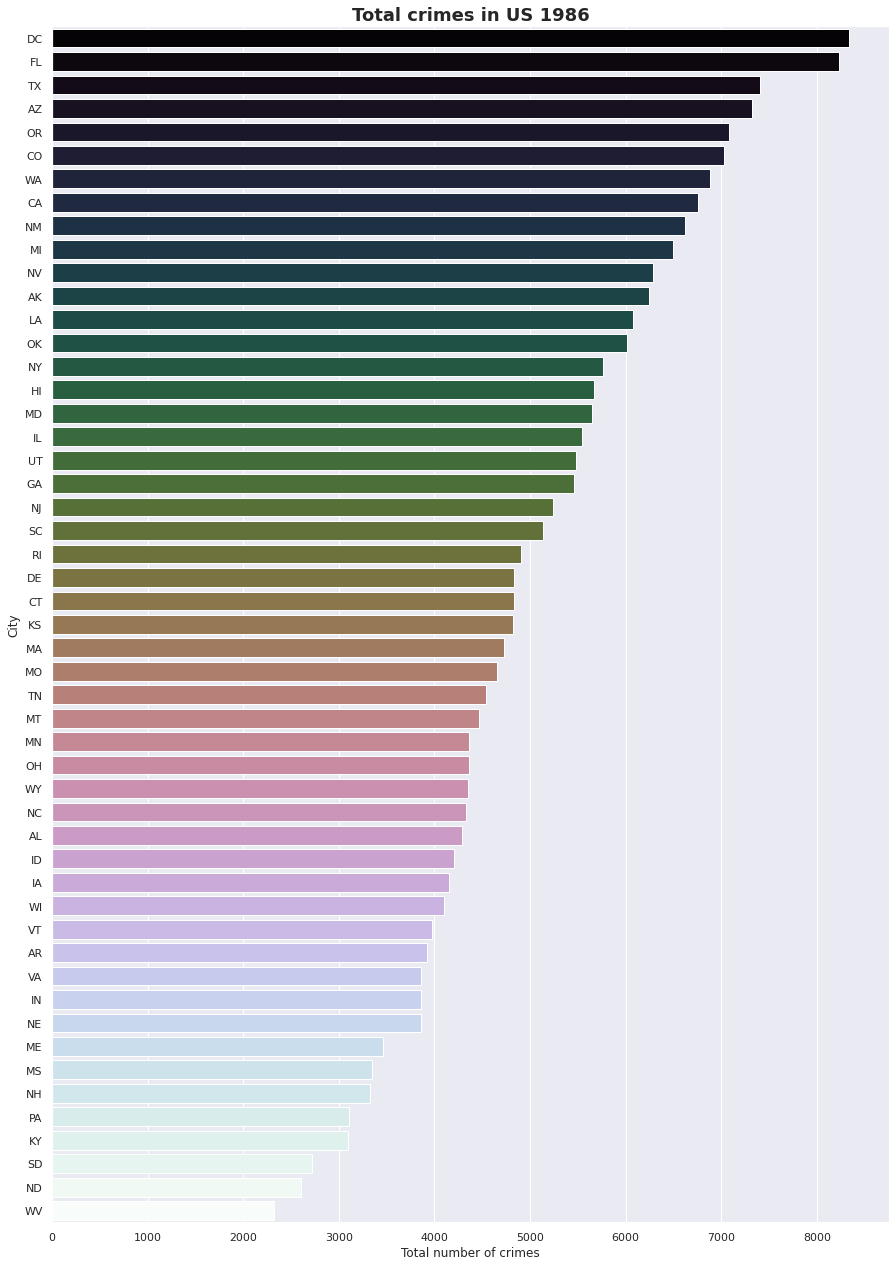

In [ ]:
#Total number of violent crimes in America
ax=plt.figure(figsize=(15,22))

ax = sns.barplot(data['TotalCrime'],          
                 y=data['CityCode'], estimator=sum,  palette="cubehelix",
                 order=data.sort_values('TotalCrime',ascending = False).CityCode)
ax.set_title('Total crimes in US 1986', fontdict={'fontsize':18, 'fontweight':'bold'})
ax.set(xlabel='Total number of crimes', ylabel='City') 

*Berdasarkan Bar Chart diatas dapat disimpulkan bahwa*
- **City DC** menempati posisi pertama terbanyak untuk lokasi kejadian kejahatan. Sehingga City DC harus perlu pengawasan yang lebih baik lagi dalam segi keamanan.
- **City WV** menempati posisi terakhir untuk lokasi kejadian kejahatan. Hal ini menunjukkan bahwa city WV tidak terlalu sering terjadi tindak kejahatan dan termasuk daerah yang aman. Namun harus tetap perlu penjagaan terhadap kota ini.

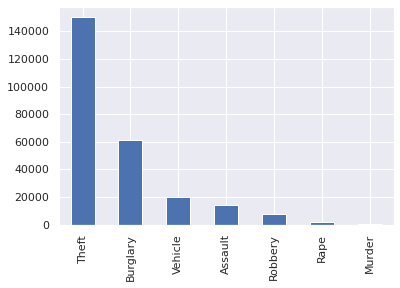

In [ ]:
ax2 = data[['Murder','Rape', 'Robbery','Assault','Burglary', 'Theft','Vehicle']].sum().sort_values(ascending=False).plot.bar()

plt.show()

*Berdasarkan Bar Chart diatas dapat disimpulkan bahwa*
- Jenis kejahatan Theft merupakan jenis kejahatan yang paling sering terjadi di US pada tahun 1986.

In [ ]:
city_Murder = data.groupby('CityCode').Murder.sum()
city_Rape = data.groupby('CityCode').Rape.sum()
city_Robbery = data.groupby('CityCode').Robbery.sum()
city_Assault = data.groupby('CityCode').Assault.sum()
city_Burglary = data.groupby('CityCode').Burglary.sum()
city_Theft = data.groupby('CityCode').Theft.sum()
city_Vehicle = data.groupby('CityCode').Vehicle.sum()

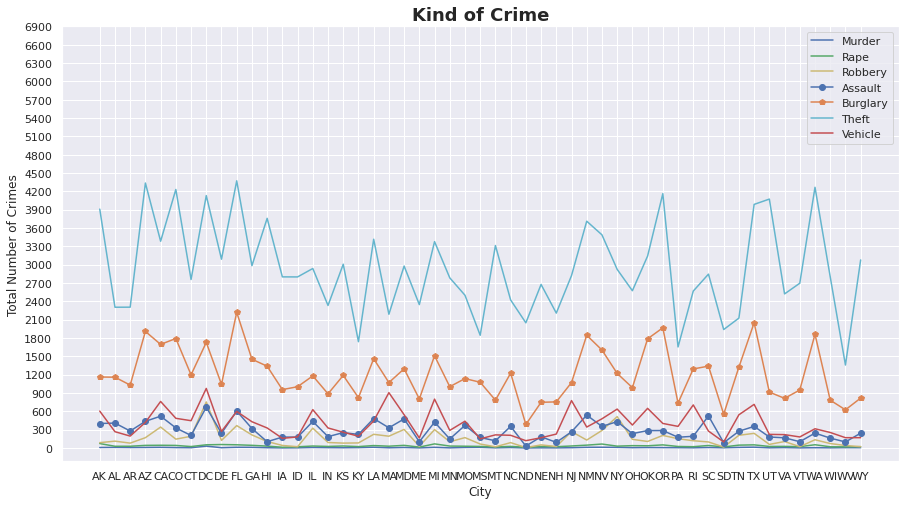

In [ ]:
#plotting the graph
plt.figure(figsize=(15,8))
plt.title('Kind of Crime', fontdict={'fontsize':18, 'fontweight':'bold'})

plt.plot(city_Murder,'b-', label='Murder')
plt.plot(city_Rape, 'g-', label='Rape')
plt.plot(city_Robbery, 'y-', label='Robbery')
plt.plot(city_Assault, 'o-', label='Assault')
plt.plot(city_Burglary, 'p-', label='Burglary')
plt.plot(city_Theft, 'c-', label='Theft')
plt.plot(city_Vehicle, 'r-', label='Vehicle')

plt.yticks(np.arange(0,7000, step=300))

plt.xlabel('City')
plt.ylabel('Total Number of Crimes')
plt.legend()
plt.show()

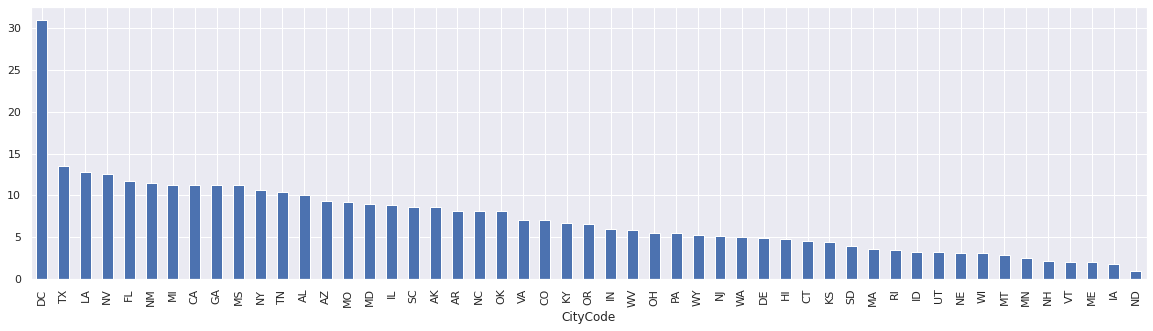

In [ ]:
plt.figure(figsize=(20,5))
city_Murder.sort_values(ascending=False).plot(kind='bar')

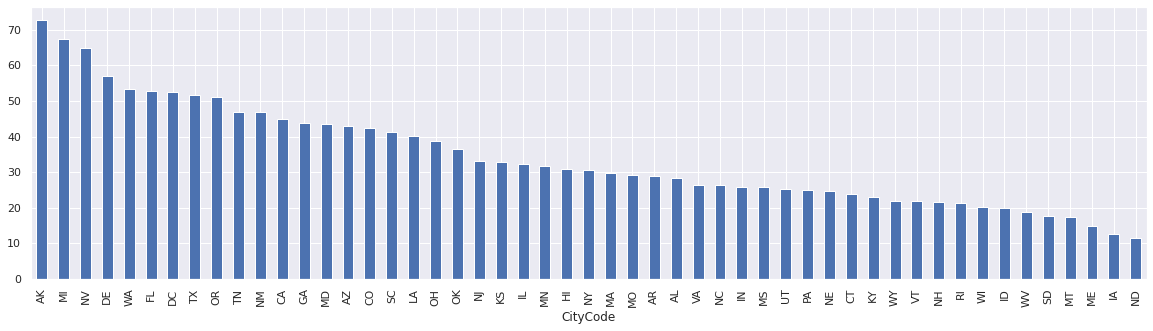

In [ ]:
plt.figure(figsize=(20,5))
city_Rape.sort_values(ascending=False).plot(kind='bar')

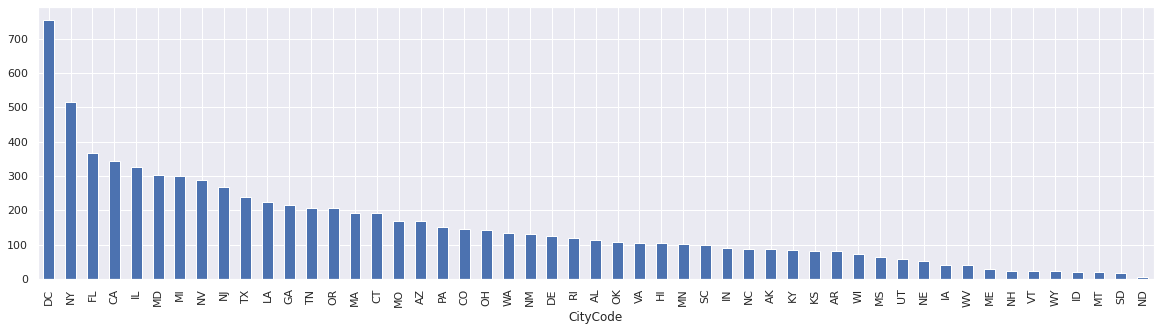

In [ ]:
plt.figure(figsize=(20,5))
city_Robbery.sort_values(ascending=False).plot(kind='bar')

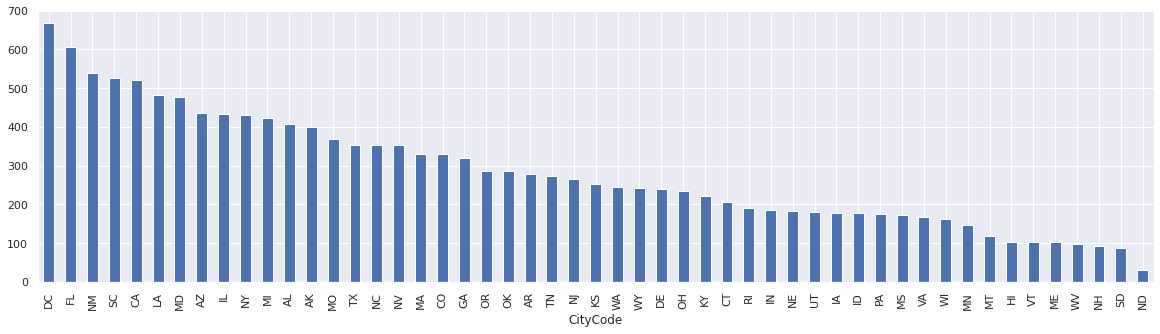

In [ ]:
plt.figure(figsize=(20,5))
city_Assault.sort_values(ascending=False).plot(kind='bar')

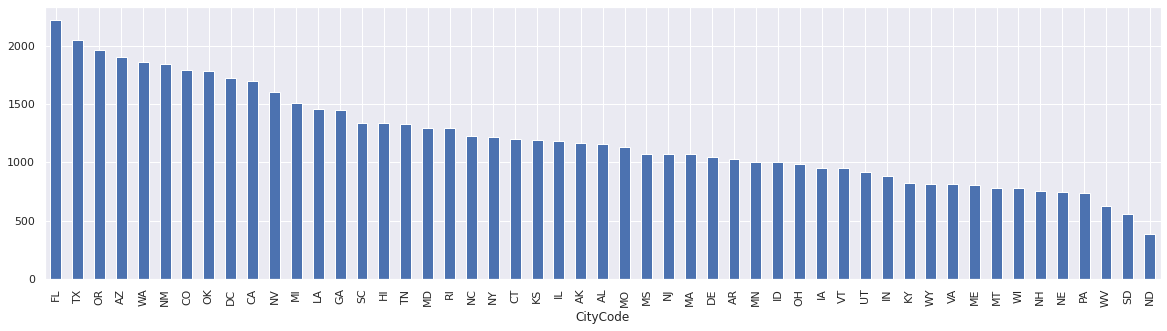

In [ ]:
plt.figure(figsize=(20,5))
city_Burglary.sort_values(ascending=False).plot(kind='bar')

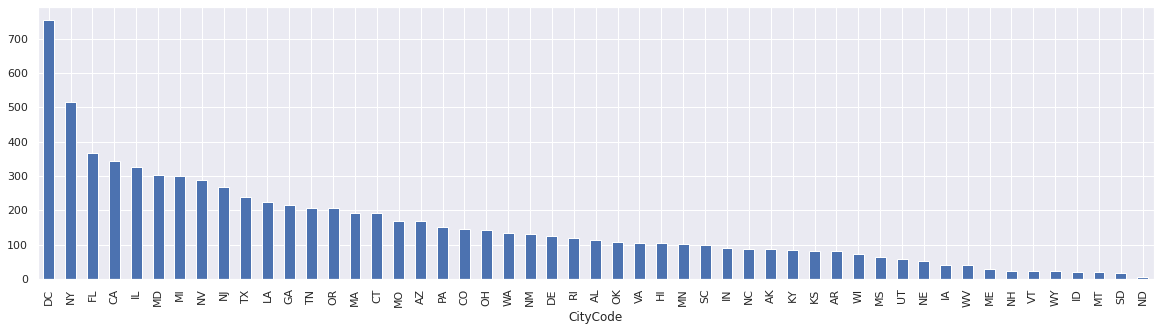

In [ ]:
plt.figure(figsize=(20,5))
city_Robbery.sort_values(ascending=False).plot(kind='bar')

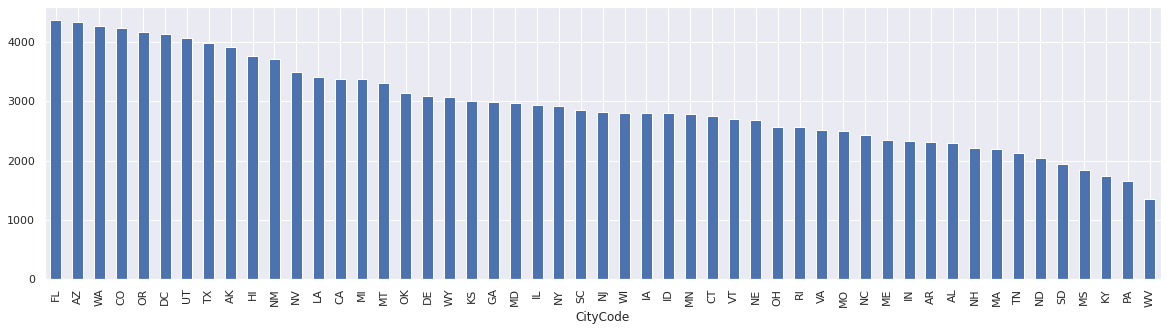

In [ ]:
plt.figure(figsize=(20,5))
city_Theft.sort_values(ascending=False).plot(kind='bar')

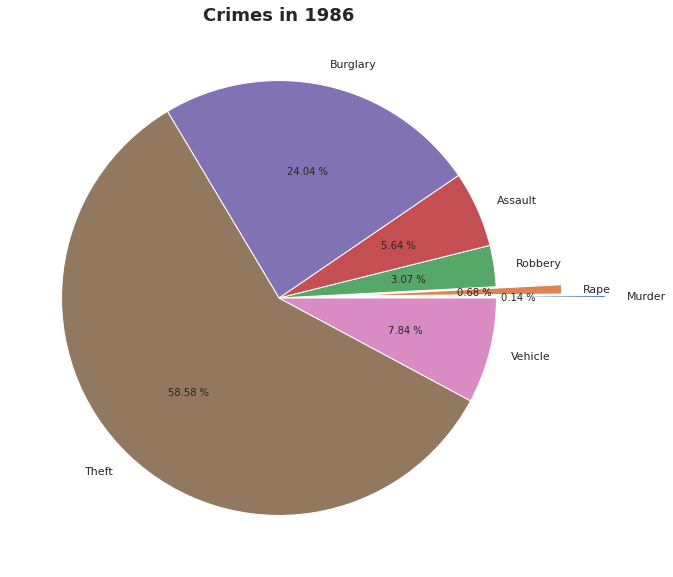

In [ ]:
#@title Pie Chart of Crime Data in US 1986
tot_Murder = data.Murder.sum()
tot_Rape = data.Rape.sum()
tot_Robbery = data.Robbery.sum()
tot_Assault = data.Assault.sum()
tot_Burglary = data.Burglary.sum()
tot_Theft = data.Theft.sum()
tot_Vehicle = data.Vehicle.sum()

plt.figure(figsize=(20,10))

label = ['Murder','Rape', 'Robbery', 'Assault', 'Burglary', 'Theft', 'Vehicle']
explode = [0.5,0.3,0,0,0,0,0]

plt.pie([tot_Murder,tot_Rape,tot_Robbery,tot_Assault,tot_Burglary, tot_Theft, tot_Vehicle], labels=label, autopct='%.2f %%', explode=explode)
plt.title('Crimes in 1986', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.show()

*Berdasarkan Chart Lingkaran diaras dapat disimpulkan bahwa*
- Persentase kejahatan terbesar ada di jenis *Theft* **Pencurian** yaitu melebihi 50% dibandingkan jenis kejahatan lainnya.
- Persentase kejahatan terkecil dapat terlihat pada bagian terkecil di diagram tersebut, yaitu *Murder* **Pembunuhan** yaitu hanya sebesar **0.14%**

BoxPlot

In [ ]:
tot_Murder = data.Murder.sum()
tot_Rape = data.Rape.sum()
tot_Robbery = data.Robbery.sum()
tot_Assault = data.Assault.sum()
tot_Burglary = data.Burglary.sum()
tot_Theft = data.Theft.sum()
tot_Vehicle = data.Vehicle.sum()

In [ ]:
import plotly.express as px

def box(dataframe, col):
    fig = px.box(dataframe, y=col, points="all")
    fig.update_layout(template = 'plotly_dark')
    fig.show()
    
for i in data.columns[1:]:
    box(data, i)

Chart diatas merupakan jenis BoxPlot. Box plot adalah jenis visualisasi data yang secara statistik merepresentasikan distribusi data melalui lima dimensi utama, yaitu nilai minimum, kuartil 1, kuartil 2 (median), kuartil 3, dan nilai maksimum.

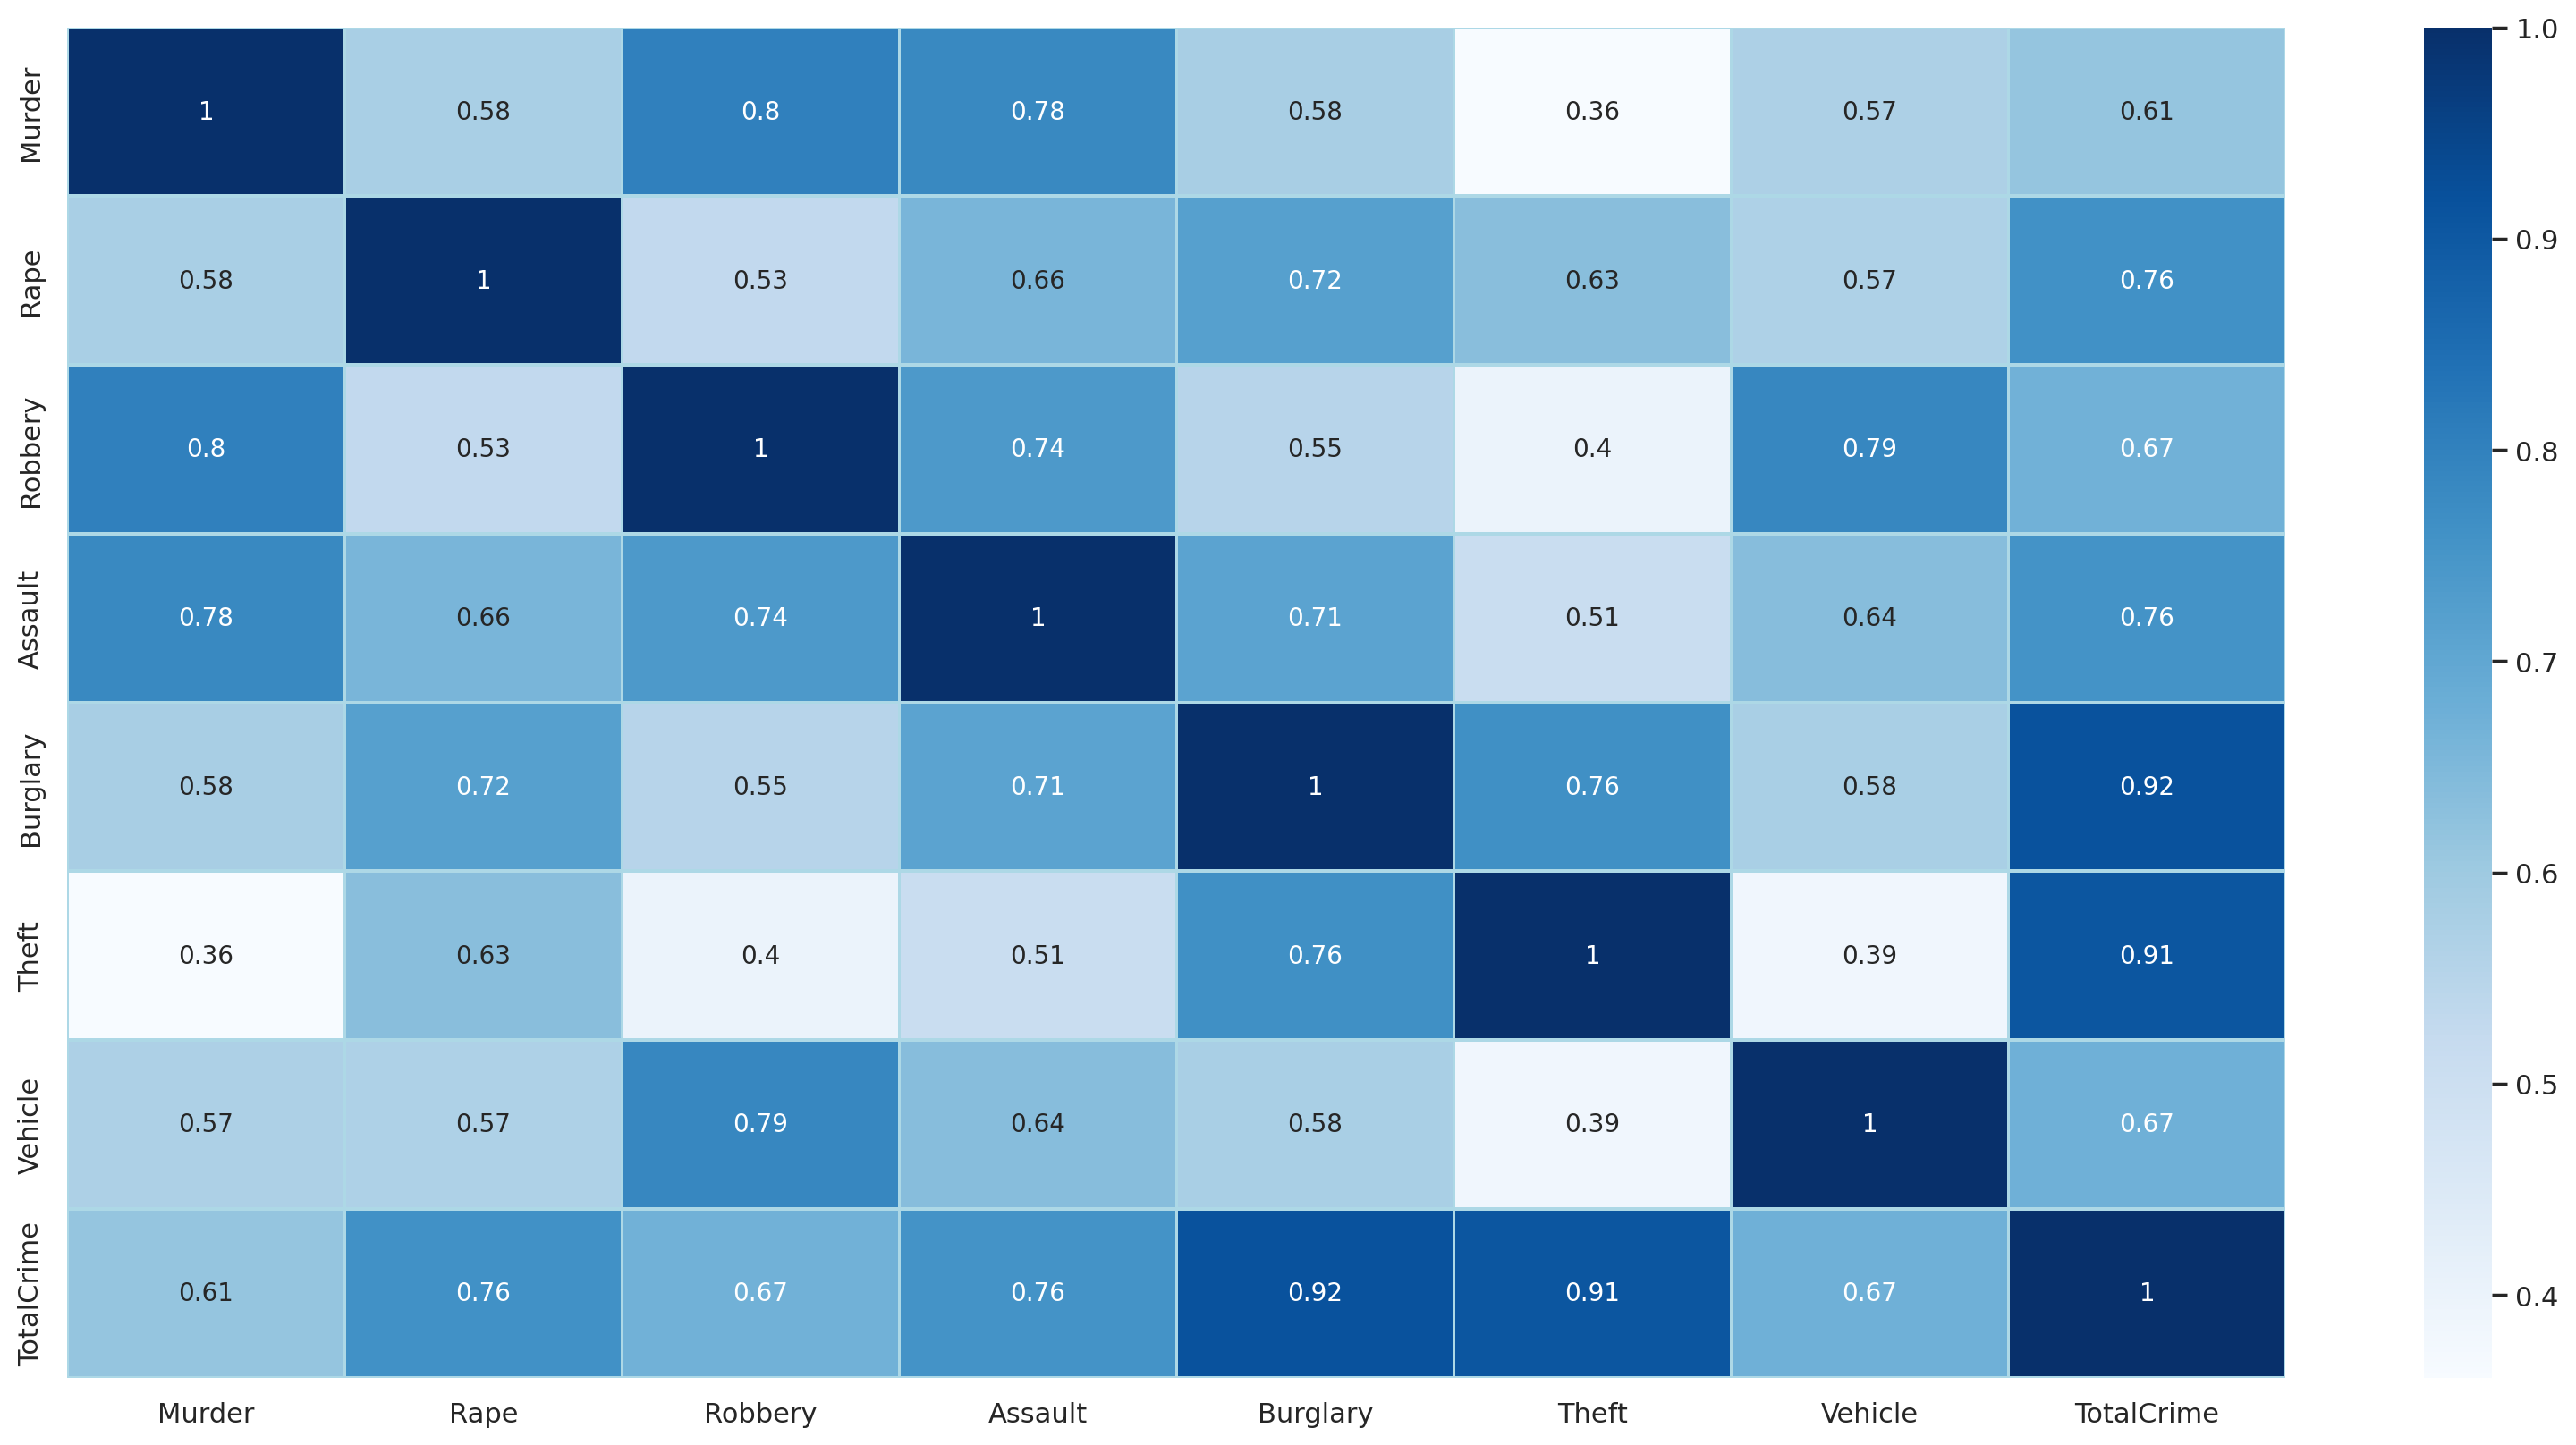

In [ ]:
#show the correlation
plt.figure(figsize=(20,10), dpi=200)
sns.heatmap(data.corr(), annot=True, cmap="Blues", linewidths=1, linecolor='lightblue')
plt.show()

Matrix diatas merupakan Correlation Matrix, yang berguna untuk melihat korelasi antar feature/column. Nilainya berkisar antara 0 - 1. Semakin mendekati nilai 1, maka korelasi antar variabel semakin tinggi.
Sedangkan semakin mendekati nol maka korelasi antara dua variabel semakin rendah. 

# Algorithm

**1. Clustering K-Means**

Pada metode clustering ini, kita akan **mengelompokkan** data crime tersebut dengan menggunakan algoritma K-Means.


K-Means clustering adalah algoritma **unsupervised learning** yang dipakai untuk mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda.

In [ ]:
data.head()

,CityCode,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,TotalCrime
0,ME,2.0,14.8,28,102,803,2347,164,3460.8
1,NH,2.2,21.5,24,92,755,2208,228,3330.7
2,VT,2.0,21.8,22,103,949,2697,181,3975.8
3,MA,3.6,29.7,193,331,1071,2189,906,4723.3
4,RI,3.5,21.4,119,192,1294,2568,705,4902.9


In [ ]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
X = data.iloc[:, 1:7].values

In [ ]:
#use elbow method to find the optimal value for k
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
fig = px.line(x=range(1,11), y=wcss)

# edit the layout
fig.update_layout(title='The Elbow Method',
                   xaxis_title='Number of Clusters',
                   yaxis_title='WCSS: Within-Cluster Sum of Square')

fig.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

[2 2 0 2 0 0 0 0 2 0 2 0 1 0 0 0 0 2 2 0 0 0 0 1 0 2 0 0 0 1 2 2 2 2 2 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 1 1]


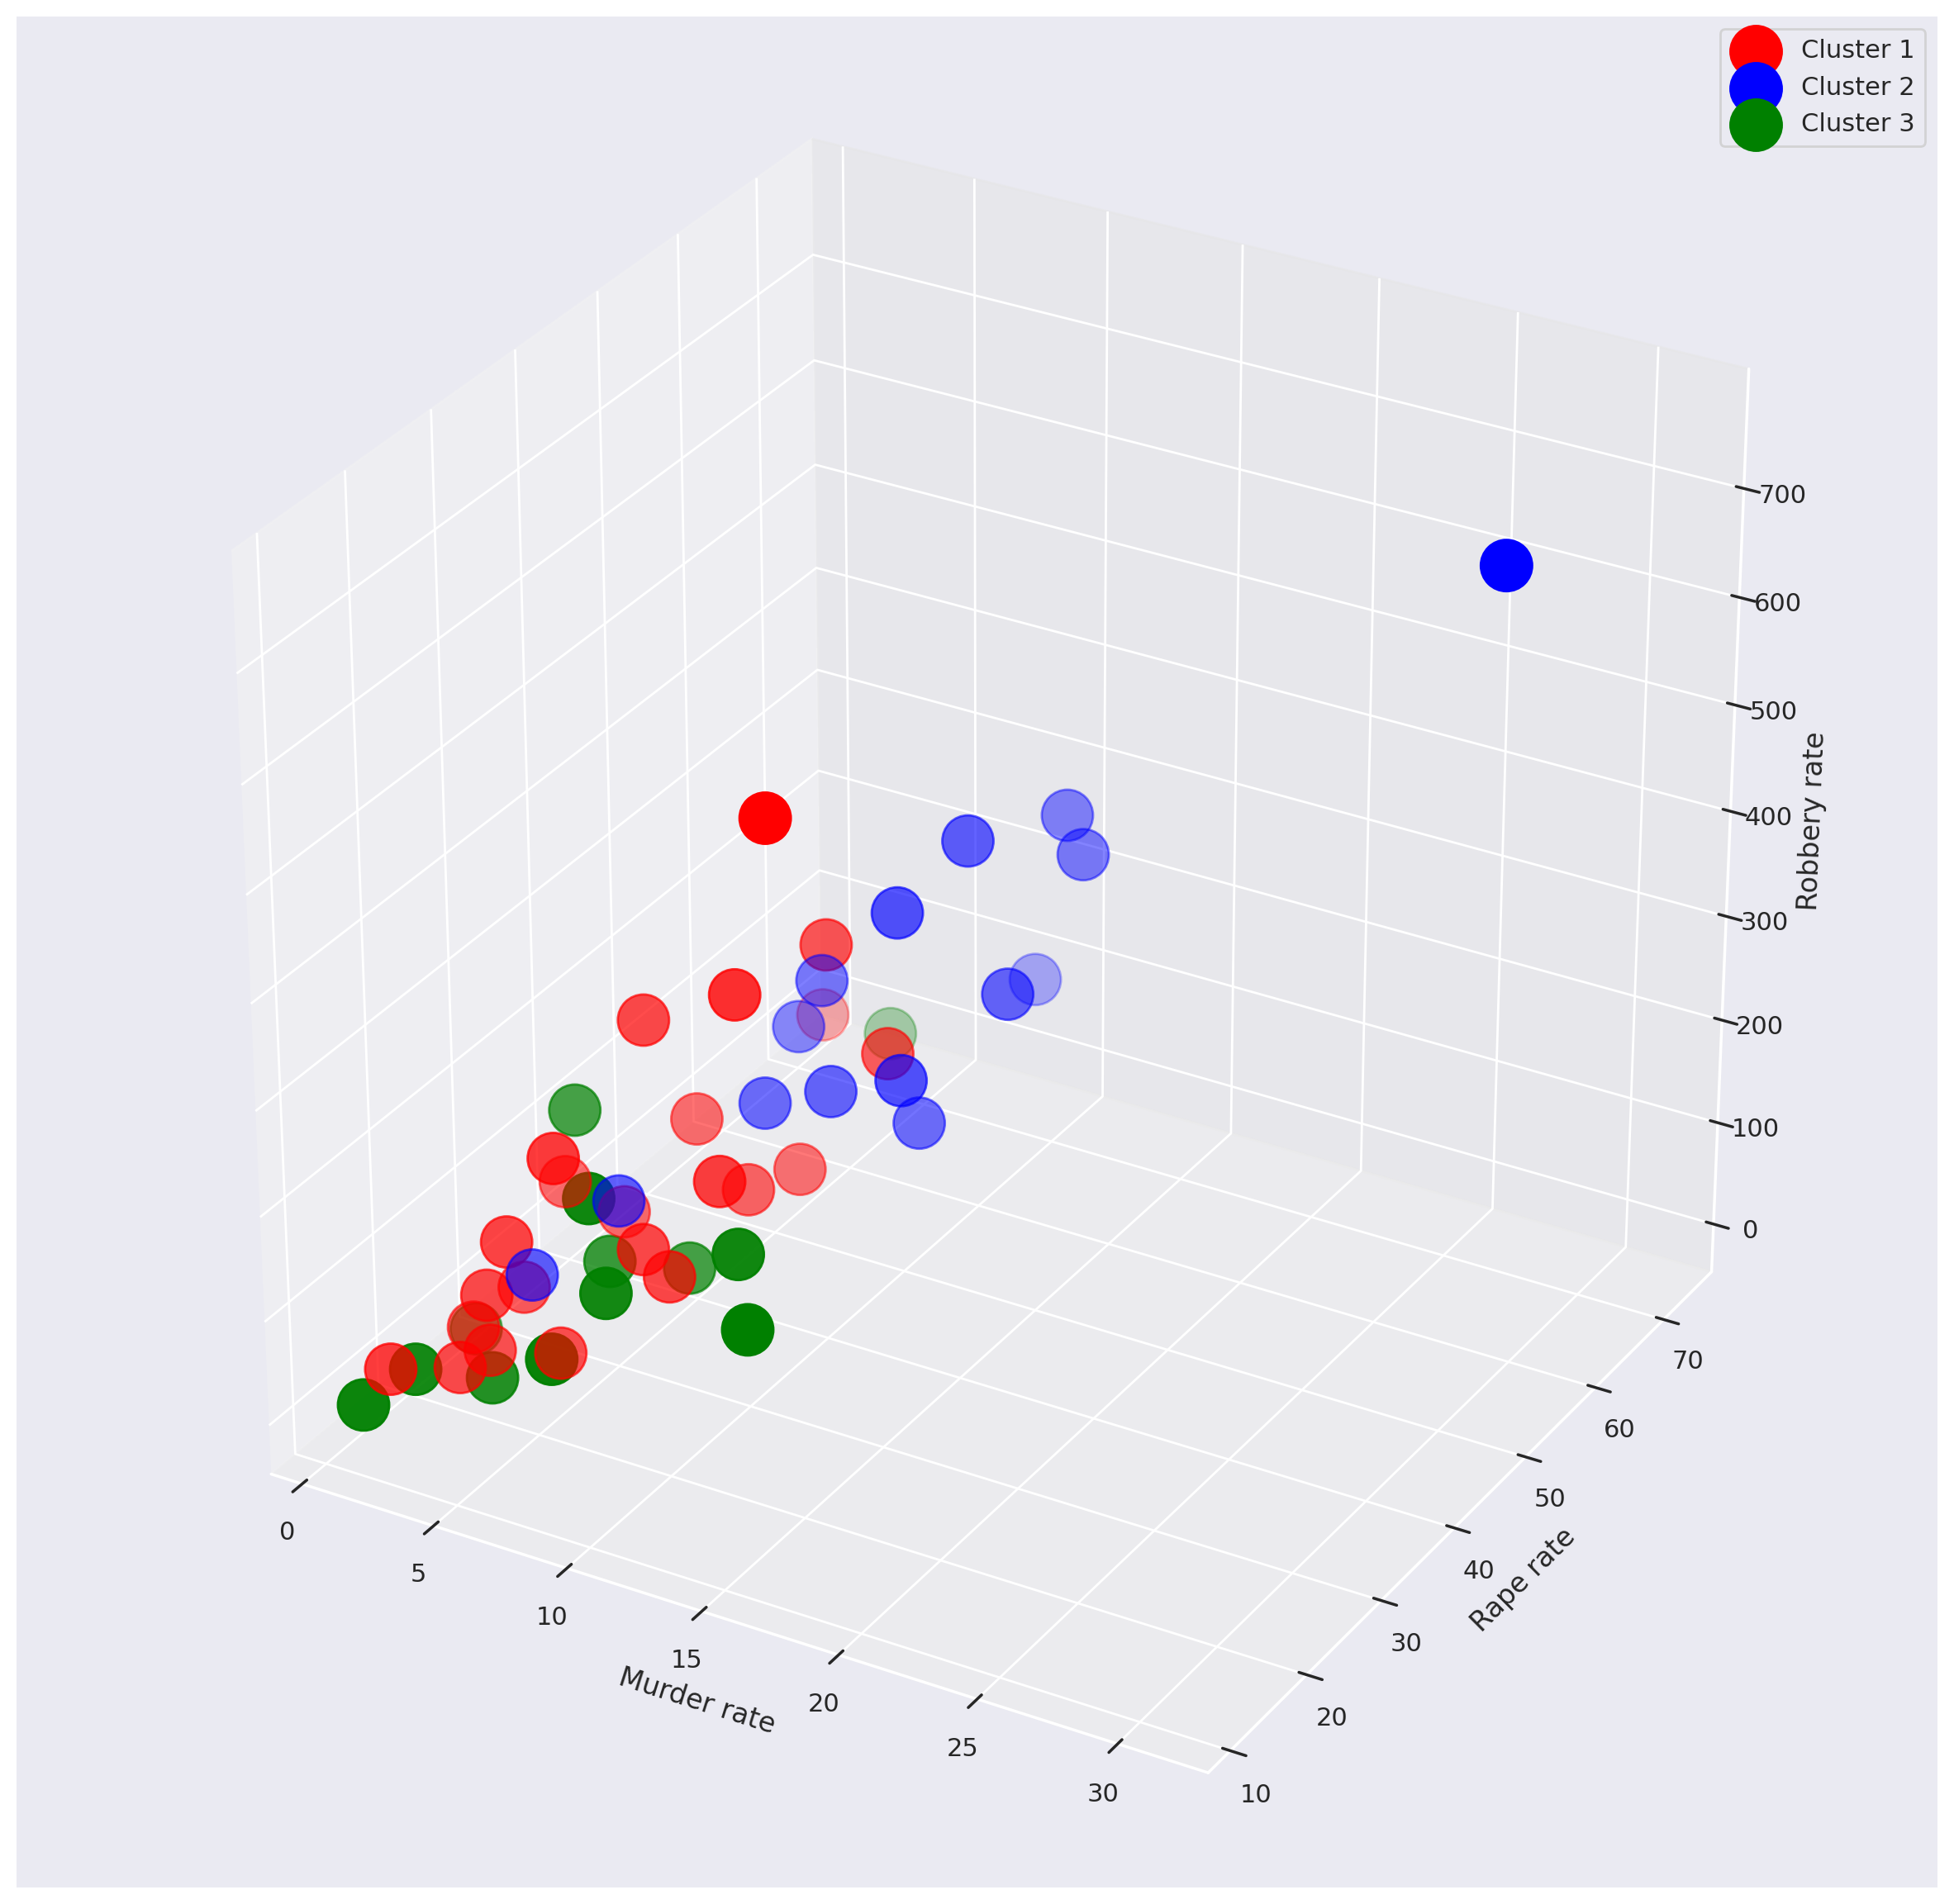

In [ ]:
fig = plt.figure(figsize = (15,15), dpi=200)

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 500, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 500, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 500, c = 'green', label = 'Cluster 3')

ax.set_xlabel('Murder rate')
ax.set_ylabel('Rape rate')
ax.set_zlabel('Robbery rate')

ax.legend()
plt.show()

In [ ]:
sub_data = data.drop(columns=['CityCode','TotalCrime'])

In [ ]:
sub_data.head(5)  

,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
0,2.0,14.8,28,102,803,2347,164
1,2.2,21.5,24,92,755,2208,228
2,2.0,21.8,22,103,949,2697,181
3,3.6,29.7,193,331,1071,2189,906
4,3.5,21.4,119,192,1294,2568,705


In [ ]:
#use elbow method to find the optimal value for k
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(sub_data)
    wcss.append(kmeans.inertia_)
    
fig = px.line(x=range(1,11), y=wcss)

# edit the layout
fig.update_layout(title='The Elbow Method',
                   xaxis_title='Number of Clusters',
                   yaxis_title='WCSS: Within-Cluster Sum of Square')

fig.show()


In [ ]:
#rescale the attributes
scaler = StandardScaler()
# fit_transform
rfm_df_scaled = scaler.fit_transform(sub_data)
rfm_df_scaled.shape

(51, 7)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns  = ['Murder','Rape', 'Robbery', 'Assault', 'Burglary', 'Theft', 'Vehicle']
rfm_df_scaled.head()

,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
0,-1.100972,-1.345889,-0.924075,-1.234727,-0.967525,-0.787089,-1.038041
1,-1.059038,-0.881494,-0.953388,-1.302811,-1.082456,-0.970976,-0.748998
2,-1.100972,-0.860700,-0.968045,-1.227918,-0.617943,-0.324065,-0.961264
3,-0.765501,-0.313130,0.285083,0.324401,-0.325826,-0.996111,2.313056
4,-0.786467,-0.888425,-0.257206,-0.621969,0.208125,-0.494722,1.405279


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.40127720663223776
For n_clusters=3, the silhouette score is 0.38873220832077626
For n_clusters=4, the silhouette score is 0.28739915070530614
For n_clusters=5, the silhouette score is 0.21108785858405577
For n_clusters=6, the silhouette score is 0.21989622993779498
For n_clusters=7, the silhouette score is 0.20925989912641763
For n_clusters=8, the silhouette score is 0.21665993056811142


In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
data_kmeans = data.copy()
data_kmeans.head()

,CityCode,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,TotalCrime
0,ME,2.0,14.8,28,102,803,2347,164,3460.8
1,NH,2.2,21.5,24,92,755,2208,228,3330.7
2,VT,2.0,21.8,22,103,949,2697,181,3975.8
3,MA,3.6,29.7,193,331,1071,2189,906,4723.3
4,RI,3.5,21.4,119,192,1294,2568,705,4902.9


In [ ]:
#memasukkan hasil model ke data
data_kmeans['Cluster_Id'] = kmeans.labels_
data_kmeans.head()

,CityCode,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle,TotalCrime,Cluster_Id
0,ME,2.0,14.8,28,102,803,2347,164,3460.8,0
1,NH,2.2,21.5,24,92,755,2208,228,3330.7,0
2,VT,2.0,21.8,22,103,949,2697,181,3975.8,0
3,MA,3.6,29.7,193,331,1071,2189,906,4723.3,1
4,RI,3.5,21.4,119,192,1294,2568,705,4902.9,1


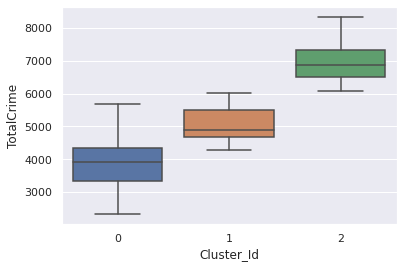

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='TotalCrime', data=data_kmeans)

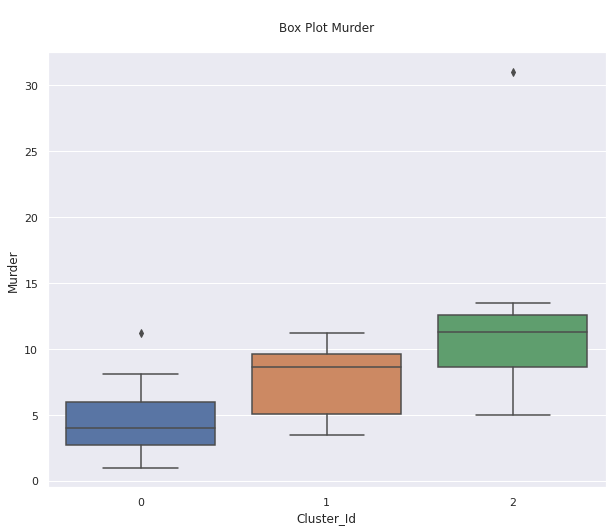

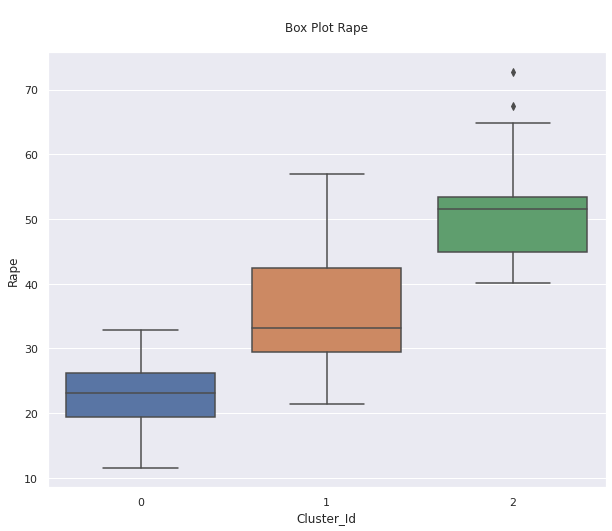

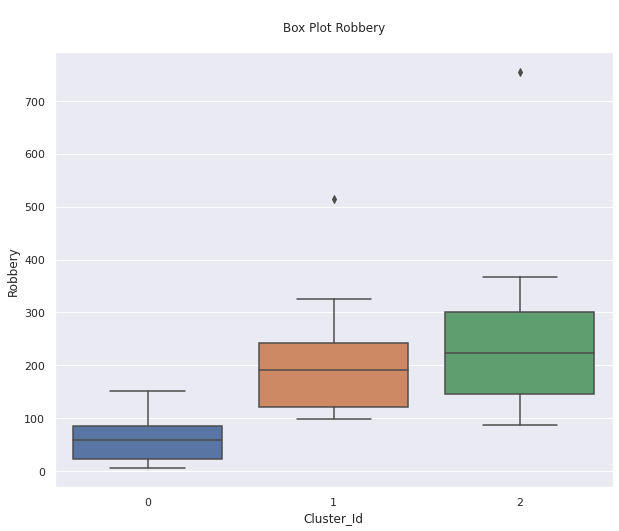

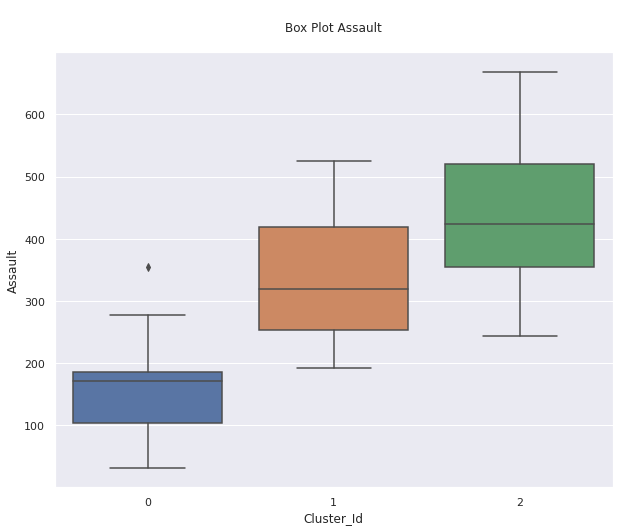

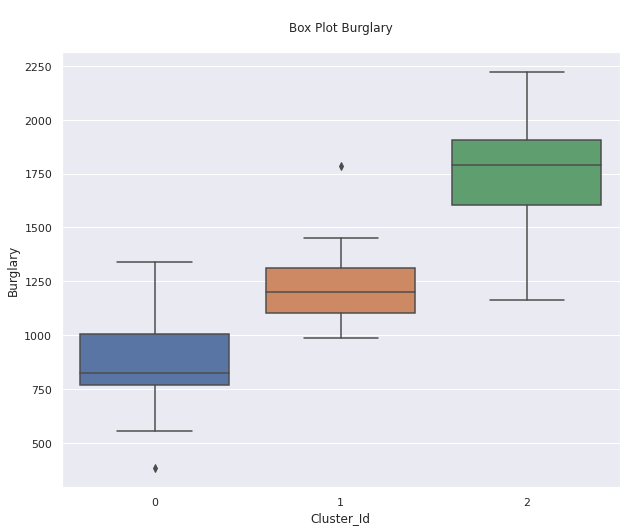

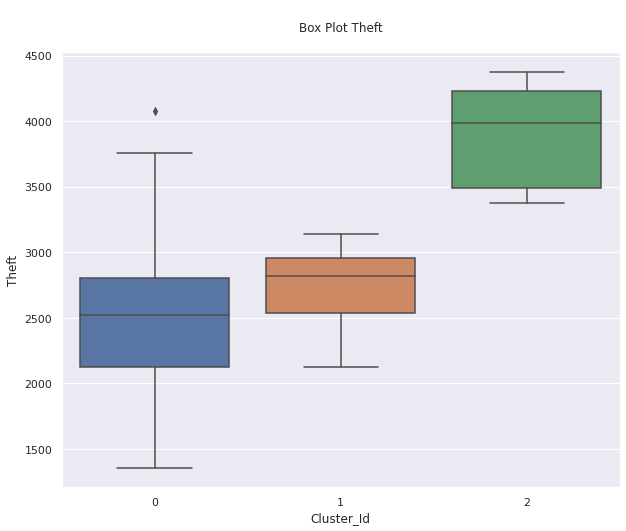

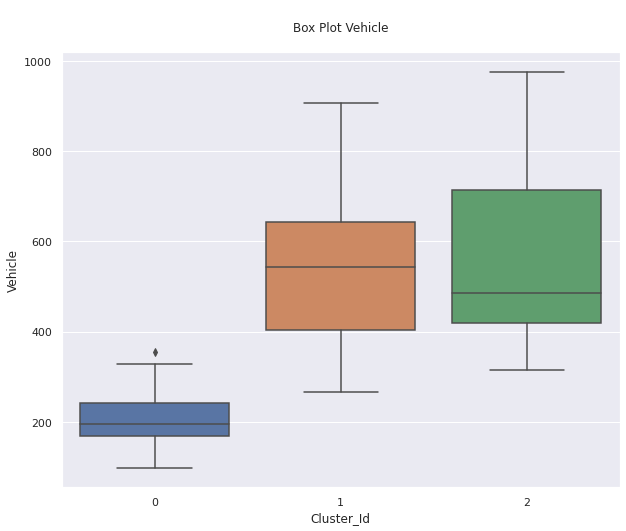

In [ ]:
#kolom_numerik = ['Amount']
kolom_numerik = ['Murder','Rape', 'Robbery', 'Assault', 'Burglary', 'Theft', 'Vehicle']
for i in kolom_numerik:
    plt.figure(figsize=(10,8))
    ax = sns.boxplot(x = 'Cluster_Id',y = i, data = data_kmeans)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()                    

Analysis:
K-Means clustering dengan 3 kategori pengelompokan:
- Cluster 0: ialah kota yang memiliki tingkat kejatahan (crime) yang tergolong rendah. Sehingga masih termasuk kategori kota yang aman karena paling jarang terjadi tindak kriminal.

- Cluster 1: ialah kota yang memiliki tingkat kejahatan menengah. Sehingga perlu lebih waspada.

- Cluster 2: ialah merupakan kelompok kota yang memiliki tingkat kejahatan tertinggi. Sehingga daerah yang termasuk dalam kelompok ini tergolong tidak aman karena sering terjadi tindak kejahatan.

**2. Hierarchical Clustering**

Hierarchical clustering --> Pengelompokan hierarkis adalah jenis algoritma **unsupervised machine learning** yang digunakan untuk mengelompokkan unlabeled data points. Seperti halnya K-means clustering,
Hierarchical clustering juga mengelompokkan titik-titik data dengan karakteristik yang serupa. Salah satu pertimbangan utama dalam menggunakan algoritma K-means adalah menentukan nilai K terlebih dahulu. Algoritma pengelompokan hierarkis tidak memiliki batasan ini. Output dari algoritma ini juga sangat berbeda dari algoritme K-means. Ini menghasilkan struktur berbentuk pohon terbalik, yang disebut dendrogram.

In [ ]:
data_s = data.iloc[:,1:].values
data_s

array([[2.0000e+00, 1.4800e+01, 2.8000e+01, 1.0200e+02, 8.0300e+02,
        2.3470e+03, 1.6400e+02, 3.4608e+03],
       [2.2000e+00, 2.1500e+01, 2.4000e+01, 9.2000e+01, 7.5500e+02,
        2.2080e+03, 2.2800e+02, 3.3307e+03],
       [2.0000e+00, 2.1800e+01, 2.2000e+01, 1.0300e+02, 9.4900e+02,
        2.6970e+03, 1.8100e+02, 3.9758e+03],
       [3.6000e+00, 2.9700e+01, 1.9300e+02, 3.3100e+02, 1.0710e+03,
        2.1890e+03, 9.0600e+02, 4.7233e+03],
       [3.5000e+00, 2.1400e+01, 1.1900e+02, 1.9200e+02, 1.2940e+03,
        2.5680e+03, 7.0500e+02, 4.9029e+03],
       [4.6000e+00, 2.3800e+01, 1.9200e+02, 2.0500e+02, 1.1980e+03,
        2.7580e+03, 4.4700e+02, 4.8284e+03],
       [1.0700e+01, 3.0500e+01, 5.1400e+02, 4.3100e+02, 1.2210e+03,
        2.9240e+03, 6.3700e+02, 5.7682e+03],
       [5.2000e+00, 3.3200e+01, 2.6900e+02, 2.6500e+02, 1.0710e+03,
        2.8220e+03, 7.7600e+02, 5.2414e+03],
       [5.5000e+00, 2.5100e+01, 1.5200e+02, 1.7600e+02, 7.3500e+02,
        1.6540e+03, 3.5400e+

In [ ]:
scaled_data = scaler.fit_transform(data_s)

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Euclidean distances')

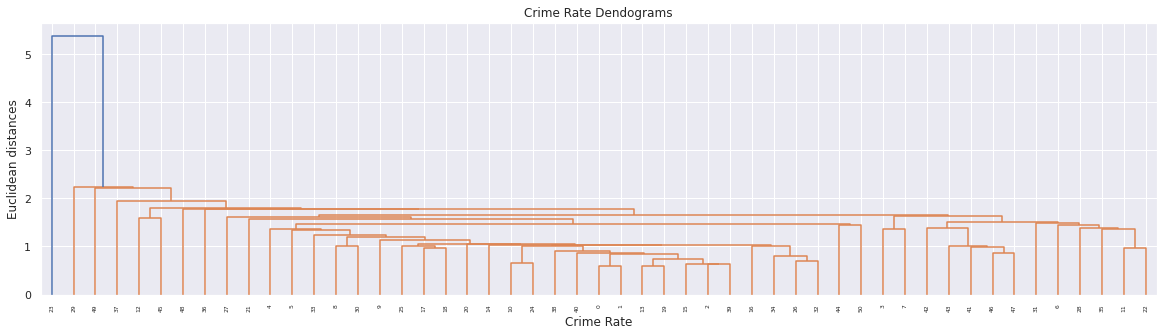

In [ ]:
#single linkage
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

Text(0, 0.5, 'Euclidean distances')

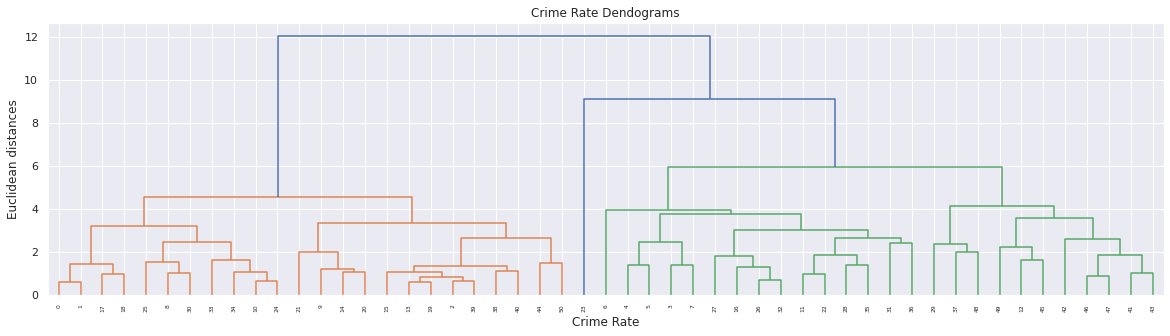

In [ ]:
#Complete Linkage
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')



Text(0, 0.5, 'Euclidean distances')

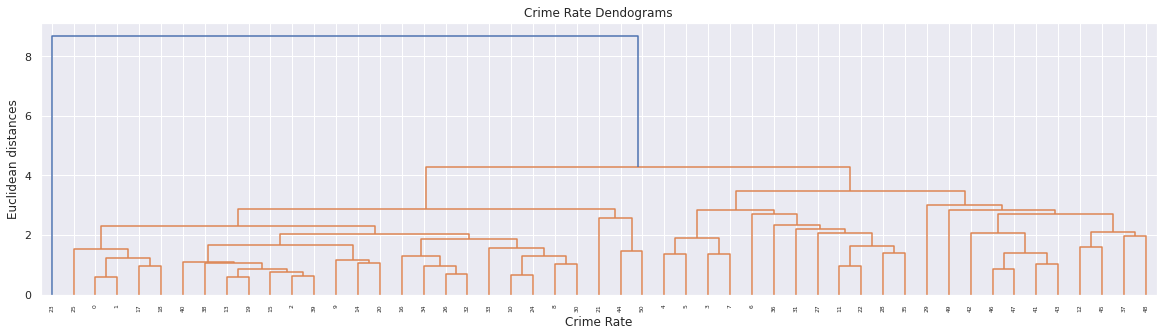

In [ ]:
#Average Linkage
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

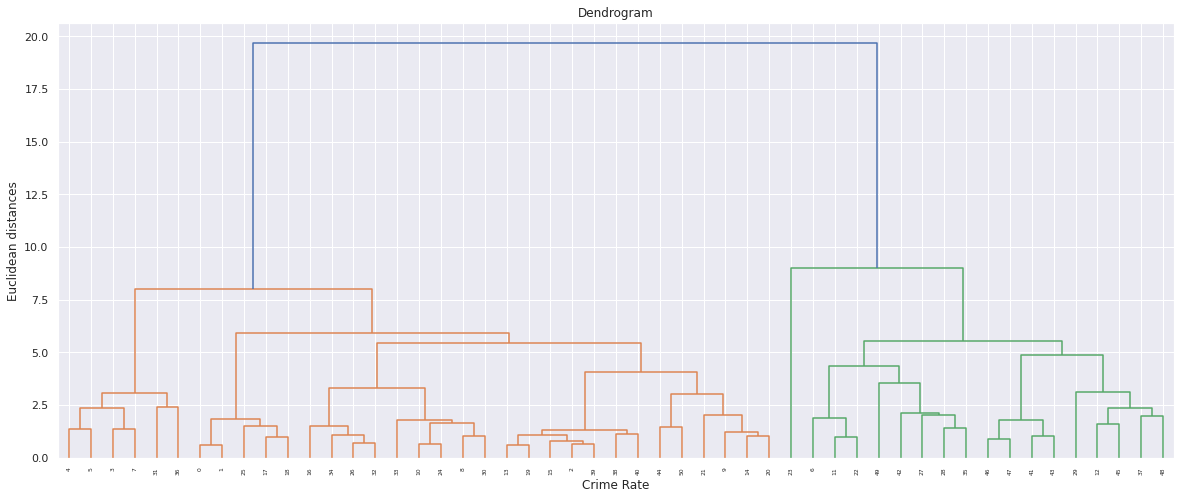

In [ ]:
# With Ward method
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

*Nilai optimal untuk clustering:*

Cara melihatnya ialah dengan melihat jarak terbesar yang vertikal tanpa adanya melintasi garis horizontal apa pun.

hitung jumlah garis pada diagram dan tentukan jumlah cluster yang optimal. 

cluster yang optimal. Nomor cluster akan menjadi 3 untuk dataset ini.

In [ ]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [ ]:
# Fit and predict to have the cluster labels.
y_pred = AC.fit_predict(data_s)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 1])

In [ ]:
# Fetch the cluster labels
data['cluster labels']= y_pred

In [ ]:
# Let's see which State falls in which cluster
data[['CityCode','cluster labels']]

,CityCode,cluster labels
0,ME,0
1,NH,0
2,VT,0
3,MA,0
4,RI,0
5,CT,0
6,NY,1
7,NJ,1
8,PA,0
9,OH,0


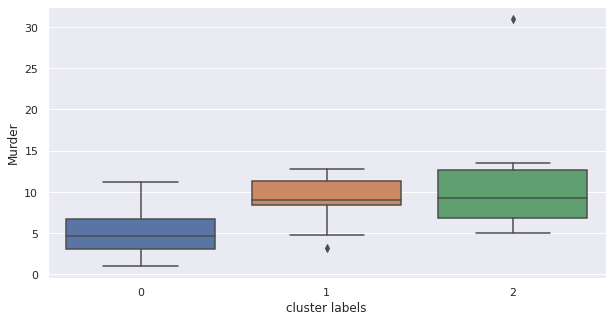

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=data)

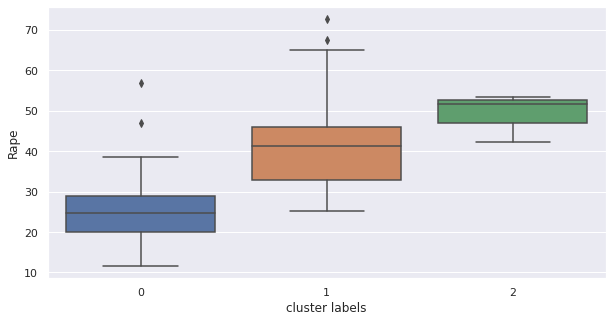

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=data)

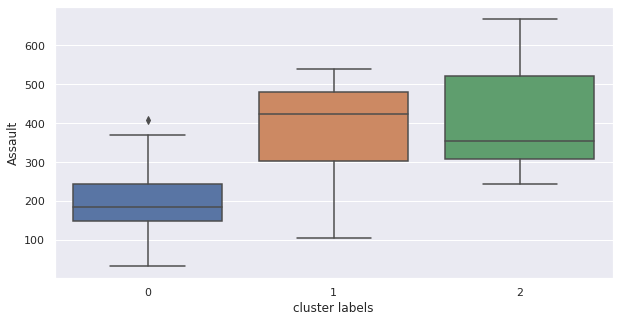

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=data)

Observasi:
- Cluster 0: Kota yang termasuk ke kelompok 0 terlihat lebih aman, dimana tingkat kejahatan yang terjadi relatif lebih sedikit.

- Cluster 1: Kota yang termasuk ke kelompok 1 terlihat memiliki tindak kriminalitas tingkat sedang. 

- Cluster 2: Kota yang termasuk ke kelompok 1 memiliki tingkat kriminal yang paling tinggi, sehingga dapat ditandai sebagai Zona Berbahaya.


In [ ]:
#kota yang termasuk ke daerah aman:
Safe_Zone= data.groupby('cluster labels')['CityCode'].unique()[0]
Safe_Zone

array(['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'PA', 'OH', 'IN', 'WI', 'MN',
       'IA', 'MO', 'ND', 'SD', 'NE', 'KS', 'DE', 'VA', 'WV', 'NC', 'KY',
       'TN', 'AL', 'MS', 'AR', 'MT', 'ID', 'WY'], dtype=object)

In [ ]:
#kota yang termasuk ke daerah sedang berbahaya:
Moderate_Zone= data.groupby('cluster labels')['CityCode'].unique()[1]
Moderate_Zone

array(['NY', 'NJ', 'IL', 'MI', 'MD', 'SC', 'GA', 'LA', 'OK', 'NM', 'UT',
       'NV', 'CA', 'AK', 'HI'], dtype=object)

In [ ]:
#kota yang termasuk ke daerah berbahaya:
Danger_Zone = data.groupby('cluster labels')['CityCode'].unique()[2]
Danger_Zone

array(['DC', 'FL', 'TX', 'CO', 'AZ', 'WA', 'OR'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

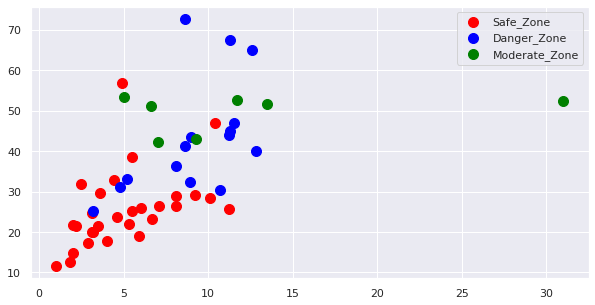

In [ ]:
#plot untuk zona masing2 cluster:
plt.figure(figsize=(10,5))
plt.scatter(data_s[y_pred==0, 0], data_s[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data_s[y_pred==1, 0], data_s[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data_s[y_pred==2, 0], data_s[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()

Pada plot diatas kita dapat melihat sebaran data yang termasuk ke dalam 3 kategori cluster tersebut, yaity Safe Zone berwarna Merah, Danger Zone bewarna Biru, dan Moderate ZOne berwarna Hijau.